# Locate trees with single copy genes (no duplications)

In [1]:
#Load all our trees
import pickle

def extract_spcode(nodename):
    return nodename.split('.')[0]

all_trees = pickle.load(open('data/alltrees.pkl', 'rb'))


We need to know what is the whole set of species covered in the analysis. We can extract this info from the trees.

In [2]:
# Get set with species covered in the analysis
all_taxa = set()
for t in all_trees.values():
    all_taxa.update(t.get_species())
print("Loaded taxa", len(all_taxa), ":", all_taxa)


Loaded taxa 15 : {'1121405', '1158165', '263820', '1255043', '637389', '713587', '525897', '933801', '224324', '273063', '1051632', '673860', '555778', '743299', '224324999'}


## Locate trees containing all species

In [3]:
# How many trees do contain all species? 
with_all_sp = []
for tname, t in all_trees.items():
    if len(t.get_species()) == len(all_taxa):
        with_all_sp.append(tname)

# The same code as above in one line
# with_all_sp = [t for t in all_trees.values() if len(t.get_species()) == len(all_taxa)]

print("Trees containing all species:", len(with_all_sp))


Trees containing all species: 115


Let's have a look at one of them

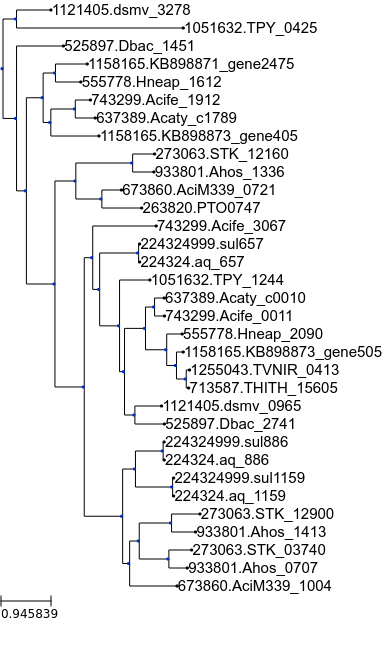

In [4]:
all_trees[with_all_sp[100]].render("%%inline")

Any problem with the selected families? Could they all be used as phylogenetic markers?

## Locate trees containing all species and only single copy genes

Those families are considered good phylogenetic markers, as the represent conserved one-to-one orthologs among all species. 


In [5]:
# How many trees cover all species and contain only single copy genes (no dups)
sptree_markers = []
for tname, t, in all_trees.items(): 
    gene_nodes = [leaf for leaf in t if leaf.species in all_taxa]
    species = set([leaf.species for leaf in gene_nodes])
    
    # We want trees with 15 leaf nodes and 15 species
    if len(species) == len(gene_nodes) and len(species) == len(all_taxa):
        sptree_markers.append(tname)
print("sptree markers (COGs):", len(sptree_markers))

sptree markers (COGs): 33


Lets have a look at some of the marker families we selected 

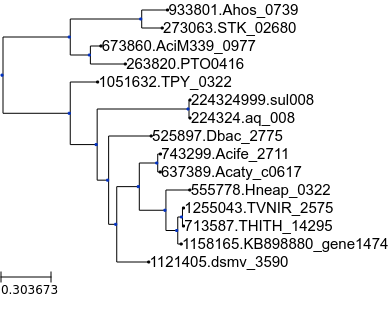

In [6]:
# Display any of our marker family trees
all_trees[sptree_markers[0]].render("%%inline")


Lets save the list of our marker families:


In [7]:
# Save (pickle) the list of marker sptree families into a text file (one family name per line): data/marker_families.pkl

with open('data/sptree_markers.pkl', 'wb') as MARKERS:
    pickle.dump(sptree_markers, MARKERS)
    